# Analytics Vidhya Competition
## Machine Learning Starter Program Hackathon (Visualization)

**Data Point**

|Variable|Description|
|--------|-----------|
|id | Unique ID |
|program_id | ID for program |
|program_type | Type of program |
|program_duration | Program duration in days |
|test_id | test ID |
|test_type | Type of test (offline/online) |
|difficulty_level | Difficulty level of test |
|trainee_id | ID for trainee |
|gender | Gender of trainee |
|education | Education Level of trainee |
|city_tier | Tier of city of residence for  trainee |
|age | Age of trainee |
|total_programs_enrolled | Total Programs Enrolled by trainee |
|is_handicapped | Does trainee suffer from a disability? |
|trainee_engagement_rating | Instructer/teaching assistant provided trainee engagement rating for the course |
|is_pass | 0 - test failed, 1 -  test passed |

**The Objective**

Your client is a multi-national financial company, which offers multiple products to the consumers. There are multiple channels to offer these products to consumers although major contribution is coming from offline distribution channel. Offline channel sells Financial products to consumers via their agent network and as per government regulation these agents must be certified to sell financial products. There are multiple certification programs against different categories of financial products. 

As this offline channel shares major contribution to total company sales, company focuses on recruitment and certify them to build large agent network. Here, major challenge is training them to get the certifications to sell various type of products.

You are given a dataset of trainee performance for the training curriculum test wise within multiple programs. Your task is to predict the performance on such tests given the demographic information and training program/test details. This will enable your client to strengthen its training problem by figuring out the most important factors that lead to a better engagement and performance for a trainee.

## 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
print('Total Row:',train.shape[0])
print('Total Column:',train.shape[1])
train.head()

Total Row: 73147
Total Column: 16


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [5]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


---

## 2. Data Wrangling

**Check Missing Value**

In [6]:
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
impute = IterativeImputer(random_state=23)

In [9]:
col_miss = ['age','trainee_engagement_rating']
train[col_miss] = impute.fit_transform(train[col_miss])

In [10]:
train.isnull().sum().sum()

0

---

**Check Duplicate Column ID**

In [11]:
train['id'].duplicated().sum()

0

In [12]:
train.drop(columns='id',axis=1,inplace=True)

In [13]:
train.nunique()

program_id                      22
program_type                     7
program_duration                10
test_id                        188
test_type                        2
difficulty_level                 4
trainee_id                   18500
gender                           2
education                        5
city_tier                        4
age                             51
total_programs_enrolled         13
is_handicapped                   2
trainee_engagement_rating       20
is_pass                          2
dtype: int64

In [14]:
train.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.000000,5,N,1.0,0
1,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.000000,2,N,3.0,1
2,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.000000,1,N,2.0,1
3,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,34.750169,4,N,1.0,1
4,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.000000,2,N,4.0,1


---

In [15]:
print(train['trainee_engagement_rating'].unique())
print(train['age'].unique())

[1.         3.         2.         4.         5.         2.67455711
 2.39556109 2.76074025 1.94200036 1.81272564 2.89001497 2.8469234
 2.02818351 2.07127508 1.76963407 1.89890879 2.24364138 1.98509194
 2.80383183 2.63146553]
[24.         26.         40.         34.75016885 42.         29.
 48.         45.         37.29443574 28.         38.56656919 39.83870264
 36.0223023  43.         27.         32.         44.         41.
 23.         38.         30.         46.         25.         31.
 34.         56.         47.         33.         22.         59.
 49.         21.         18.         35.         36.         50.
 55.         39.         51.         20.         19.         54.
 58.         57.         37.         52.         53.         36.52550879
 17.         63.         60.        ]


In [16]:
train['trainee_engagement_rating'] = train['trainee_engagement_rating'].astype(int)
train['age'] = train['age'].astype(int)

In [17]:
train['trainee_engagement_rating'].value_counts()

1    25614
2    17292
4    13113
3    11553
5     5575
Name: trainee_engagement_rating, dtype: int64

In [18]:
train['age'].value_counts()

34    9550
36    6597
38    5701
37    4774
45    4043
44    3723
28    3211
43    3136
27    3005
46    2990
29    2730
26    2445
30    2169
39    2151
42    2023
47    1999
25    1904
31    1602
41    1243
24    1240
48    1207
32     969
23     699
49     651
33     595
40     562
22     400
50     276
21     269
56     213
35     210
57     196
51     166
20      89
55      70
58      64
52      61
19      60
18      45
17      35
53      30
54      25
59      16
63       2
60       1
Name: age, dtype: int64

---

## 3. Data Visualization

### Univariate Analysis

First of all, let see the distribution of target variable.

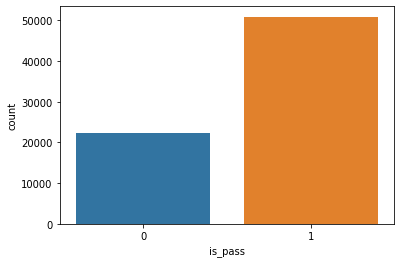

In [19]:
sns.countplot(x='is_pass',data=train)

There is a slightly Imbalanced Data on target variable, so we handle this problem later.

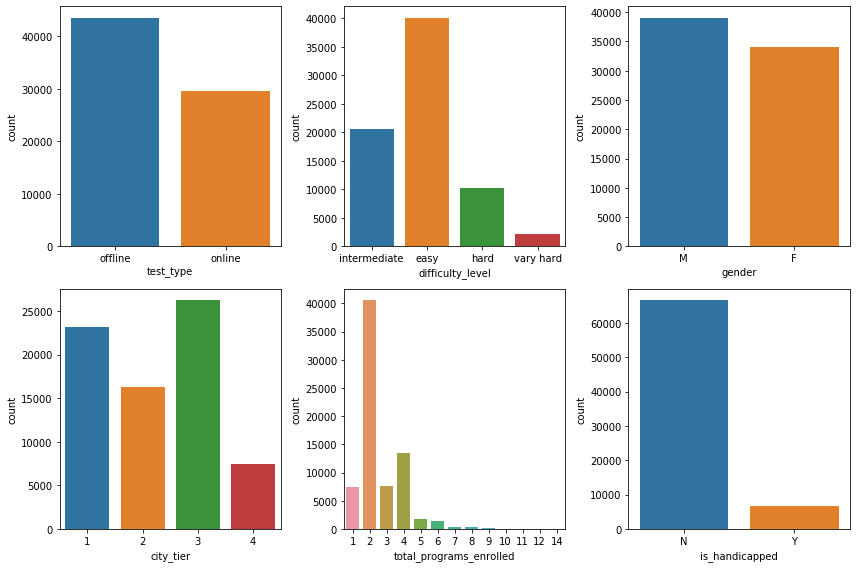

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(12,8))
sns.countplot(x='test_type',data=train,ax=axes[0,0])
sns.countplot(x='difficulty_level',data=train,ax=axes[0,1])
sns.countplot(x='gender',data=train,ax=axes[0,2])
sns.countplot(x='city_tier',data=train,ax=axes[1,0])
sns.countplot(x='total_programs_enrolled',data=train,ax=axes[1,1])
sns.countplot(x='is_handicapped',data=train,ax=axes[1,2])
plt.tight_layout()
plt.show()

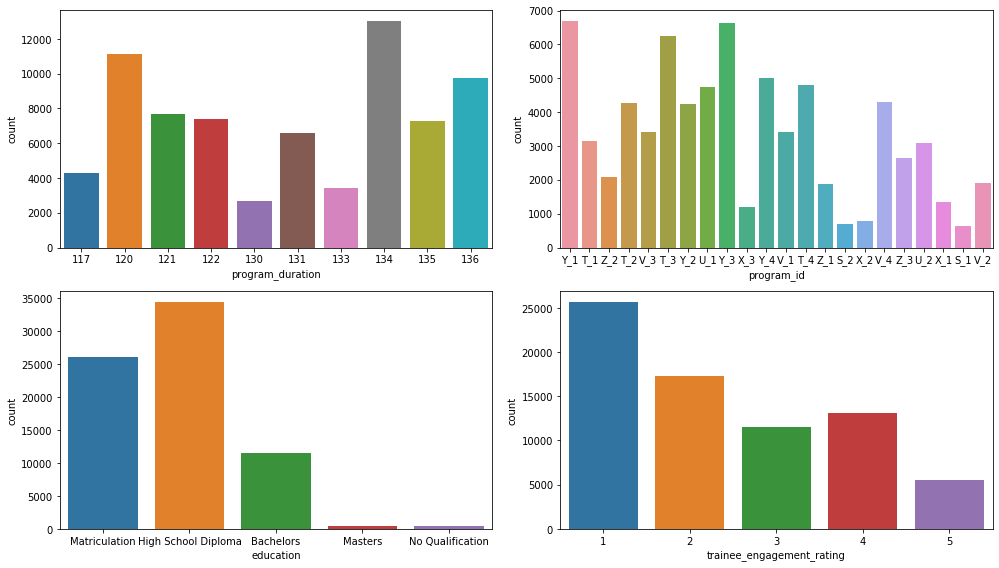

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14,8))
sns.countplot(x='program_duration',data=train,ax=axes[0,0])
sns.countplot(x='program_id',data=train,ax=axes[0,1])
sns.countplot(x='education',data=train,ax=axes[1,0])
sns.countplot(x='trainee_engagement_rating',data=train,ax=axes[1,1])
plt.tight_layout()
plt.show()

### Bivariate Analysis

**What are kind of program bring the most trainee to pass the test?**

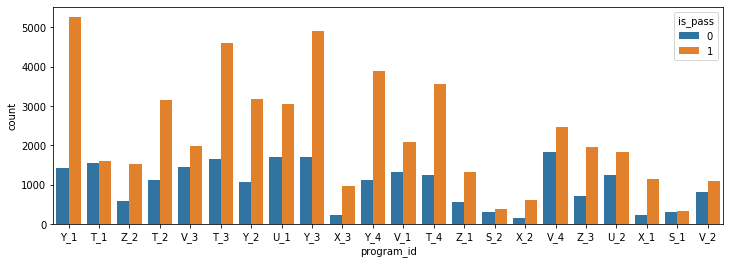

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(data=train, x='program_id', hue='is_pass')
plt.show()

Program Y and T is the most taken by trainees followed by program V, U, Z and other.

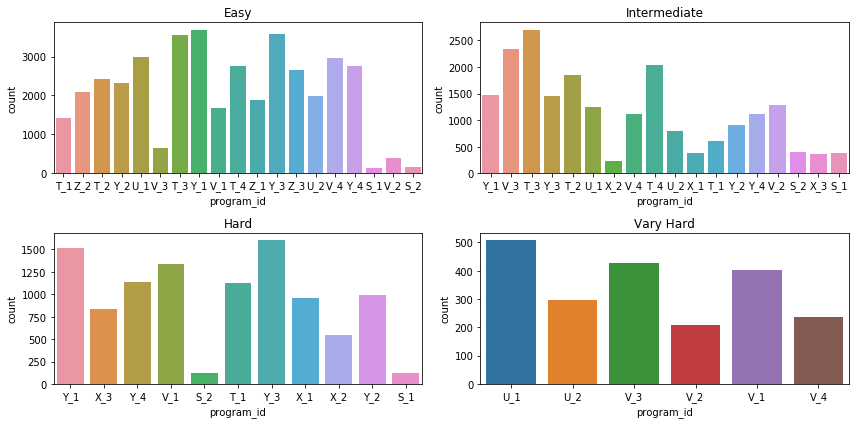

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
sns.countplot(train['program_id'][train['difficulty_level']=='easy'],ax=axes[0,0]).set_title('Easy')
sns.countplot(train['program_id'][train['difficulty_level']=='intermediate'],ax=axes[0,1]).set_title('Intermediate')
sns.countplot(train['program_id'][train['difficulty_level']=='hard'],ax=axes[1,0]).set_title('Hard')
sns.countplot(train['program_id'][train['difficulty_level']=='vary hard'],ax=axes[1,1]).set_title('Vary Hard')
plt.tight_layout()
plt.show()

**Are the program duration of the test affect someone who not passes the test?**

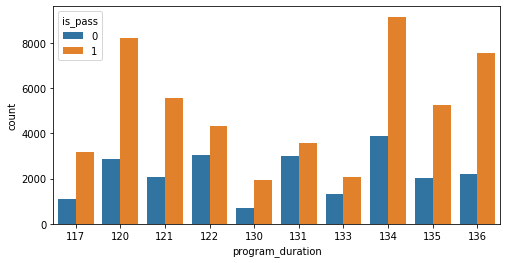

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x='program_duration', hue='is_pass', data=train)
plt.show()

According to the plot above, the duration of the test program did not significantly affect a participant.

**Are the type of test have an impact on trainee?**

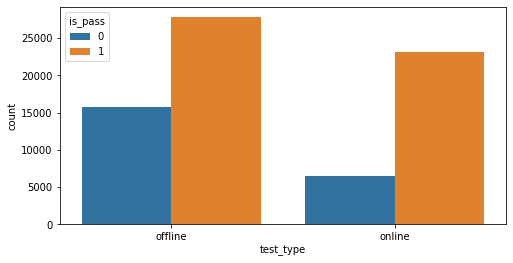

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(data=train, x='test_type', hue='is_pass')
plt.show()

**Which difficulty levels have a high impact caused trainees to fail the test?**

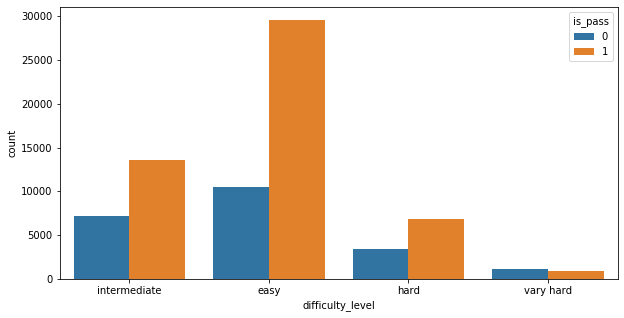

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x='difficulty_level', hue='is_pass')
plt.show()

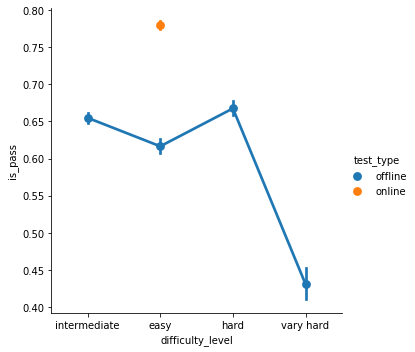

In [27]:
sns.catplot(x='difficulty_level',y='is_pass',hue='test_type',data=train,kind='point')

Online test type is only included easy difficulty level and it always gives a higher chance to pass the test for participants. But on the offline type test, there are including all of the difficulty levels of test. Based on the plot above we can see that the very hard difficulty level has a significant impact on the trainee to pass the test.

**Are the Gender type have an affect the test?**

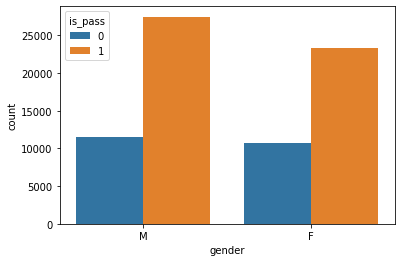

In [28]:
sns.countplot(x='gender',hue='is_pass',data=train)
plt.show()

Obviously the gender type doesn't have an effect on the test performance. Both genders have the same distribution whether they pass the test or not.

**Are the level of education have an impact on the result of the test?**

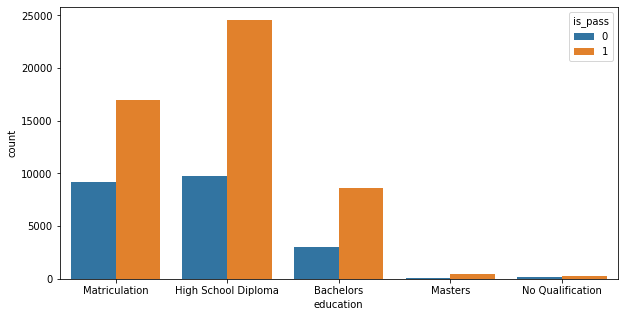

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='is_pass',data=train)
plt.show()

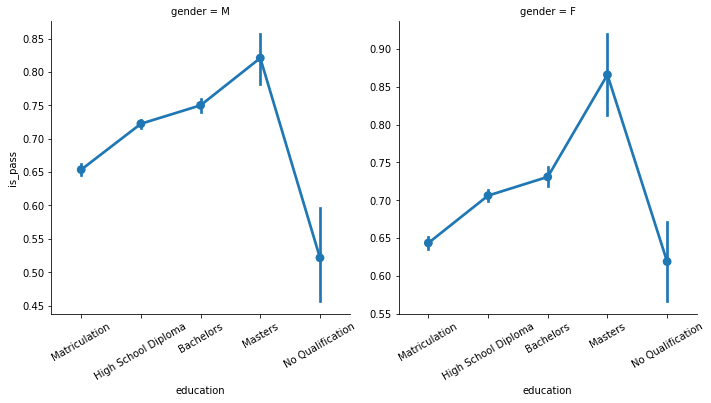

In [30]:
g=sns.catplot(x='education',y='is_pass',col='gender',data=train,kind='point',sharey=False)
g.set_xticklabels(rotation=30)
plt.show()

Matriculation and High School Diploma is the most education owned by participants for both gender, but of course, Master Degree education has the most likely to pass the test.

**Which city has the most participants passed the test?**

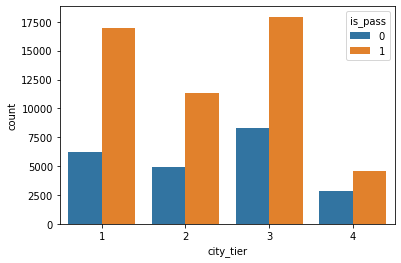

In [31]:
sns.countplot(x='city_tier',hue='is_pass',data=train)
plt.show()

City 1 and 3 had the most trainee pass the test.

**Are the range of age affects someone who doesn't pass the test?**

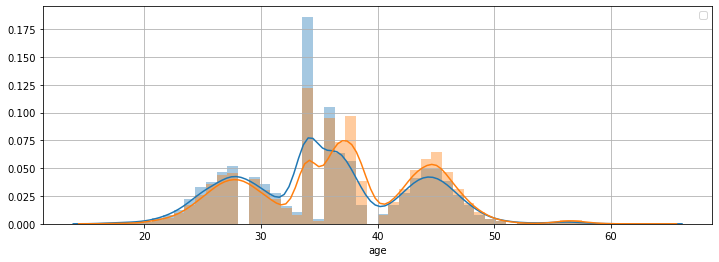

In [32]:
plt.figure(figsize=(12,4))
plt.grid('black')
plt.legend(['0','1'])
sns.distplot(train['age'][train['is_pass']==0])
sns.distplot(train['age'][train['is_pass']==1])
plt.show()

Range age between 34-39 is the most that does not pass the test.

**Are total program enrolled take by participants have an impact to pass the test?**

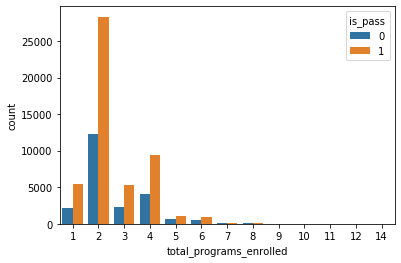

In [33]:
sns.countplot(x='total_programs_enrolled',hue='is_pass',data=train)
plt.show()

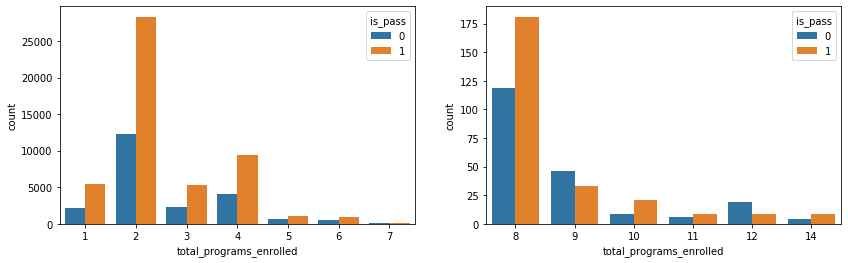

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(14,4))
sns.countplot(x=train['total_programs_enrolled'][train['total_programs_enrolled']<=7],hue='is_pass',data=train,ax=ax[0])
sns.countplot(x=train['total_programs_enrolled'][train['total_programs_enrolled']>7],hue='is_pass',data=train,ax=ax[1])

Most of the trainees take a maximum of 7 programs. This makes sense cause if you take more programs to be enrolled, you can get tired. And this can affect your performance test.

**Is a handicapped person to affect the test?**

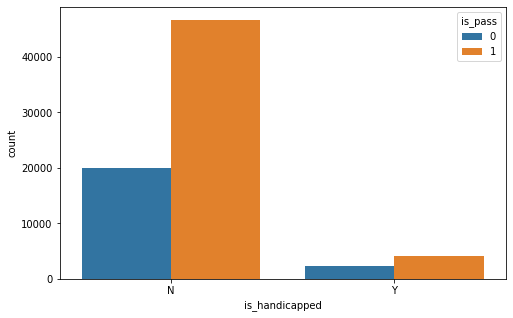

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='is_handicapped',hue='is_pass',data=train)
plt.show()

In [36]:
print('Participant not have handicapped :',train[train['is_handicapped']=='N']['is_handicapped'].count())
print('Participant have handicapped :',train[train['is_handicapped']=='Y']['is_handicapped'].count())

Participant not have handicapped : 66577
Participant have handicapped : 6570


Most of the participants are not handicapped.

**Which rating has more influence participants to pass the test?**

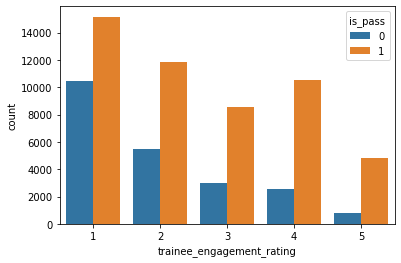

In [37]:
sns.countplot(x='trainee_engagement_rating',hue='is_pass',data=train)
plt.show()